# Plot the waveforms and spectrograms computed using CWT in successively zomed-in time-frequency windows

In [1]:
# Imports
from pandas import Timestamp, Timedelta
from utils_basic import ROOTDIR_HYDRO as rootdir
from utils_basic import time2filename
from utils_wavelet import get_scales_and_freqs, get_stream_cwt
from utils_preproc import read_and_process_windowed_hydro_waveforms
from utils_plot import plot_cascade_zoom_in_hydro_waveforms_and_cwt_powers, save_figure

In [2]:
# Inputs
## Data
starttimes = ["2020-01-13T20:00:00Z", "2020-01-13T20:01:01.5Z"]
durs = [120.0, 10.0]
station_to_plot = "B00"
locations_to_plot = ["01", "02", "03", "04", "05", "06"]

## Preprocessing
min_freq_filt = 40.0
max_freq_filt = 70.0
deci_factor = 2

## Wavelet transform
wavelet = "cmor"
center_freq = 2.0
bandwidth = 20.0
min_scales = 5
max_sacale = 50
num_scales = 128

## Plotting
xdim = 2.0
ydim = 1.5

ylim_wf = (-1e-2, 1e-2)

min_freqs_plot = [30.0, 30.0]
max_freqs_plot = [200.0, 100.0]

major_time_spacings = [60.0, 5.0]
minor_time_spacings = [15.0, 1.0]

major_freq_spacings = [25.0, 10.0]
minor_freq_spacings = [5.0, 2.0]

major_pressure_spacings = 5e-3
minor_pressure_spacings = 1e-3

dbmin = 0.0
dbmax = 15.0

linewidth_wf = 0.1

In [3]:
# Read and preprocess waveforms
## Unfiltered
starttime = starttimes[0]
dur = durs[0]
stream_no_filt = read_and_process_windowed_hydro_waveforms(starttime, dur, stations=station_to_plot, locations=locations_to_plot, decimate=True, decimate_factor=deci_factor)

## Filtered
stream_filt = read_and_process_windowed_hydro_waveforms(starttime, dur, stations=station_to_plot, locations=locations_to_plot, freqmin=min_freq_filt, freqmax=max_freq_filt, decimate=True, decimate_factor=deci_factor)

In [4]:
# Compute the CWT
scales, freqs = get_scales_and_freqs(wavelet, center_freq, bandwidth, min_scales, max_sacale, num_scales)
specs = get_stream_cwt(stream_no_filt, wavelet=wavelet, scales=scales, bandwidth=bandwidth, center_freq=center_freq)

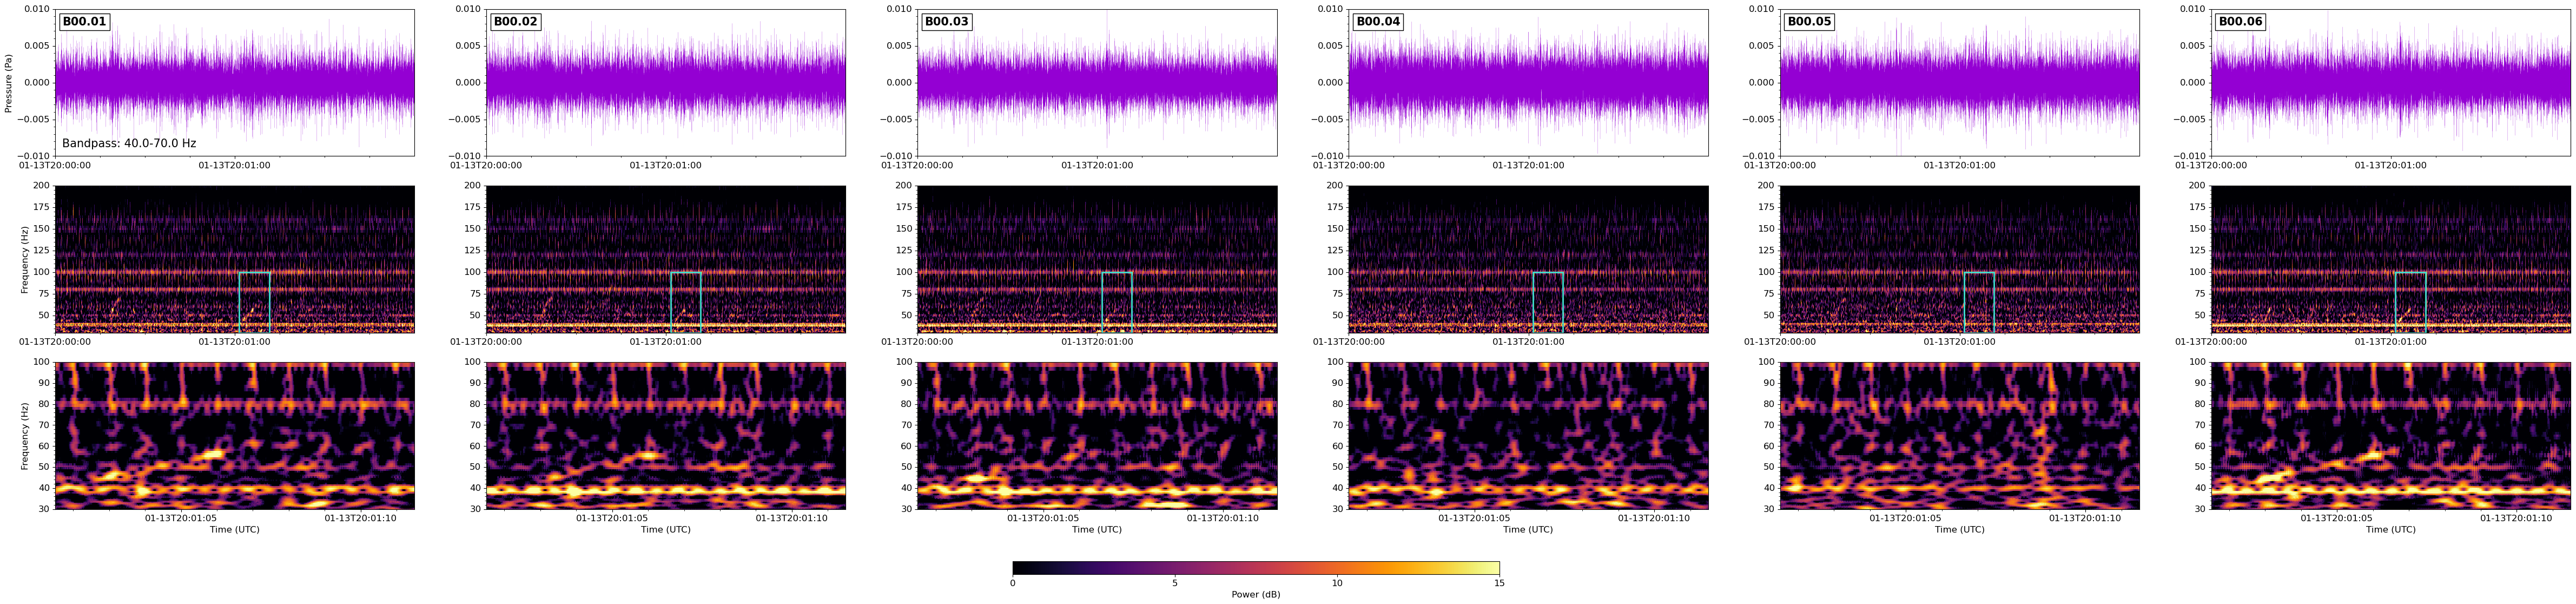

In [5]:
# Plot the waveforms and CWT powers
window_dict = {"starttimes": starttimes, "durations": durs, "min_freqs": min_freqs_plot, "max_freqs": max_freqs_plot, "major_time_spacings": major_time_spacings, "minor_time_spacings": minor_time_spacings, "major_freq_spacings": major_freq_spacings, "minor_freq_spacings": minor_freq_spacings}

fig, axes, cbar = plot_cascade_zoom_in_hydro_waveforms_and_cwt_powers(stream_filt, specs, window_dict, min_freq_filt, max_freq_filt, dbmin=dbmin, dbmax=dbmax, ylim_wf=ylim_wf, linewidth_wf=linewidth_wf, major_pressure_spacing=major_pressure_spacings, minor_pressure_spacing=minor_pressure_spacings)

In [6]:
# Save the figure
starttime = starttimes[0]
timestr = time2filename(starttime)
figname = f"high_q_glider_cascade_hydro_waveforms_and_cwt_powers_{timestr}_{station_to_plot}.png"
save_figure(fig, figname, outdir=rootdir)

Figure saved to /Volumes/OmanData/data/hydrophones/high_q_glider_cascade_hydro_waveforms_and_cwt_powers_20200113T200000_B00.png
